In [1]:
import sys
import glob
import json
import numpy as np
import pandas as pd
import SimpleITK as sitk
from medpy.io import load
from itertools import chain
import matplotlib.pyplot as plt

%matplotlib inline 

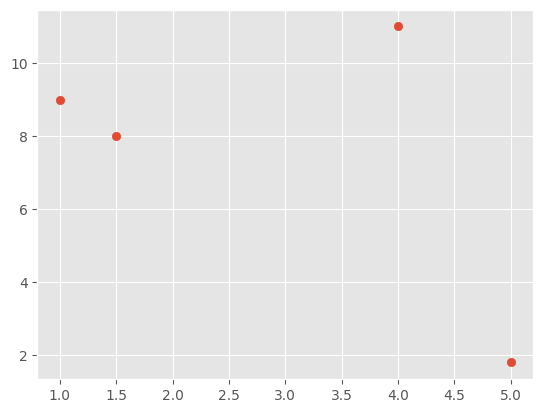

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x = [1, 5, 1.5, 4]
y = [9, 1.8, 8, 11]
plt.scatter(x,y)
plt.show()

In [3]:
def read_workdir(path):
    f = open(path)
    data = json.load(f)
    f.close()
    return data['image_paths'], data['label_paths']

In [4]:
def load_image(path_nii):
    image_data, image_header = load(path_nii)
    image_sitk = image_header.get_sitkimage()
    image_direction = image_header.get_direction()
    image_offset = image_header.get_offset()
    image_voxel_spacing = image_header.get_voxel_spacing()
    return image_data, image_sitk, image_header

In [5]:
def render_file(path):
    image_data, image_sitk, image_header = load_image(path)
    
    # print(image_sitk)
    print(image_data.shape)
    
    plt.figure(figsize=(16,16))
    for i in range(image_data.shape[2]):
        plt.subplot(6,6,i+1)
        plt.imshow(image_data[:,:,i], cmap='gray')

In [6]:
file_list = sorted(glob.glob('/home/mpmri/Data/fluke/workdir/nnUNet_raw_data/Task2213_picai_fluke/labelsTr/*'))

In [15]:
for f_lbl in file_list[10:]:
    print(f_lbl)
    lbl, _, _ = load_image(f_lbl)
    f_img = f_lbl.replace('labelsTr','imagesTr').replace('.nii.gz','')
    im1, _, _ = load_image(f_img + '_0000.nii.gz')
    im2, _, _ = load_image(f_img + '_0001.nii.gz')
    im3, _, _ = load_image(f_img + '_0002.nii.gz')
    if len(np.unique(lbl)) == 3:
        break

/home/mpmri/Data/fluke/workdir/nnUNet_raw_data/Task2213_picai_fluke/labelsTr/10010_1000010.nii.gz
/home/mpmri/Data/fluke/workdir/nnUNet_raw_data/Task2213_picai_fluke/labelsTr/10011_1000011.nii.gz
/home/mpmri/Data/fluke/workdir/nnUNet_raw_data/Task2213_picai_fluke/labelsTr/10012_1000012.nii.gz


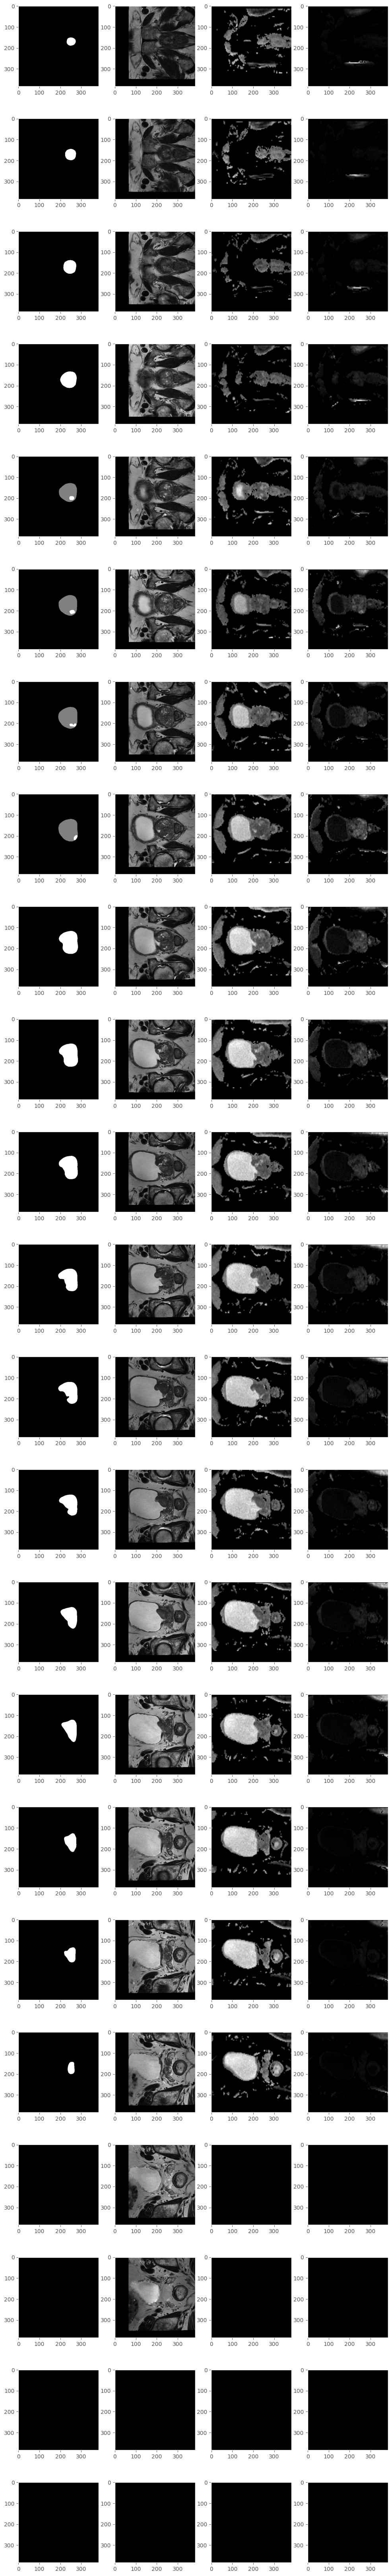

In [16]:
n_img = im1.shape[2]
plt.figure(figsize=(12,84))
for i in range(n_img):
    plt.subplot(n_img,4,i*4+1)
    plt.imshow(lbl[:,:,i], cmap='gray');plt.grid(False);
    plt.subplot(n_img,4,i*4+2)
    plt.imshow(im1[:,:,i], cmap='gray');plt.grid(False);
    plt.subplot(n_img,4,i*4+3)
    plt.imshow(im2[:,:,i], cmap='gray');plt.grid(False);
    plt.subplot(n_img,4,i*4+4)
    plt.imshow(im3[:,:,i], cmap='gray');plt.grid(False);